# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

Primero hay que definir los números Duales en este notebook.

In [66]:
using Plots

In [1]:
# Defino un tipo parametrico
struct Dual{T, K}
    x::T
    x′::K
end

In [2]:
Dual(c::Real) = Dual(c, 0.)
dual(x0::Real) = Dual(x0, 1.)

dual (generic function with 1 method)

In [3]:
dual(2.)

Dual{Float64,Float64}(2.0, 1.0)

In [4]:
import Base: +, -, *, /, ^

In [5]:
+(u::Dual, v::Dual) = Dual(u.x + v.x, u.x′ + v.x′)
-(u::Dual, v::Dual) = Dual(u.x - v.x, u.x′ - v.x′)
*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x′ + u.x′ * v.x)

* (generic function with 183 methods)

In [6]:
function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x′ - y * v.x′)/v.x )
end

/ (generic function with 74 methods)

In [7]:
function ^(u::Dual, n::Int)
    y = u.x^(n-1)
    Dual(u.x^n, n * y * u.x′)
end

^ (generic function with 53 methods)

In [8]:
+(a::Real, u::Dual) = Dual(a + u.x, u.x′)
+(u::Dual, a::Real) = Dual(a + u.x, u.x′)

+ (generic function with 183 methods)

In [25]:
-(a::Real, u::Dual) = Dual(a - u.x, u.x′)
-(u::Dual, a::Real) = Dual(u.x - a, u.x′)

- (generic function with 197 methods)

In [10]:
*(a::Real, u::Dual) = Dual(a * u.x, u.x′ * a)
*(u::Dual, a::Real) = Dual(a * u.x, u.x′ * a)

* (generic function with 185 methods)

In [11]:
/(a::Real, u::Dual) = Dual(a / u.x, -((a / u.x)*u.x′) / u.x)
/(u::Dual, a::Real) = Dual(u.x / a, u.x′ / a)

/ (generic function with 76 methods)

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

In [12]:
using Base.Test

In [13]:
@test Dual(1., 1.) + Dual(-1, -1) == Dual(0., 0.)

Test Passed

In [14]:
@test Dual(2, 2) + Dual(2, 2) == Dual(4, 4)

Test Passed

In [15]:
@test Dual(2, 1) - Dual(0, 1) == Dual(2, 0)

Test Passed

In [16]:
@test Dual(5., 5.) - Dual(1, 6) == Dual(4., -1.)

Test Passed

In [29]:
sign(-5)

-1

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

In [17]:
import Base:show

In [35]:
function show(io::IO, u::Dual)
    u.x′ > 0 ? print(u.x,"+",u.x′,"ε"): print(u.x, u.x′,"ε")
end

show (generic function with 271 methods)

## 4

Obtengan la derivada de 
$$h(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

In [20]:
# Defino las las funciones y el cociente de ellas
f(x) = 3*x^2 - 8*x + 5
g(x) = (7*x^3) - 1
h(x) = f(x) / g(x)

h (generic function with 1 method)

In [43]:
x = dual(1.)

1.0+1.0ε

In [44]:
h(x)

0.0-0.3333333333333333ε

In [45]:
# la derivada es lo siguiente
h′(x) = ((6*x - 8) * (7*x^3 - 1) - (3*x^2 - 8*x + 5) * (21*x^2 - 1)) / (7x^3 - 1)^2

h′ (generic function with 1 method)

Entonces la componente $\varepsilon$ de $h(x_D)$ con $x_D$ un dual tiene que ser igual a $h'(x)$, veamos que esto es cierto

In [46]:
@test h(x) == Dual(h(1.), h′(1.))

Test Passed

Éxito!!!

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

In [47]:
import Base: sqrt, exp, log, sin, cos, sinh, cosh

In [49]:
sin(u::Dual) = Dual(sin(u.x), u.x′ * cos(u.x))
cos(u::Dual) = Dual(cos(u.x), -u.x′ * sin(u.x))
exp(u::Dual) = Dual(exp(u.x), u.x′ * exp(u.x))
log(u::Dual) = Dual(log(u.x), u.x′ / u.x)
sinh(u::Dual) = Dual(sinh(u.x), u.x′ * cosh(u.x))
cosh(u::Dual) = Dual(cosh(u.x), u.x′ * sinh(u.x))

cosh (generic function with 12 methods)

In [53]:
h(x) = sin(x^3 - 2/x^6)
h′(x) = cos(x^3 - 2/x^6) * (3*x^2 + 12/x^7) # Su derivada calculada a mano

h′ (generic function with 1 method)

In [55]:
x0 = 2
x = dual(x0) # La variable x evaluada en x0

2+1.0ε

In [63]:
dual_der = h(x).x′
an_der = h′(2);

In [61]:
print("La derivada evaluada en x0=2 mediante duales es ", dual_der)

La derivada evaluada en x0=2 mediante duales es -1.384934905523464

In [64]:
print("La derivada analíticamente es ", an_der)

La derivada analíticamente es -1.384934905523464

In [65]:
print("Error: ", abs(dual_der - an_der))

Error: 0.0

In [71]:
x_range = 1:0.01:5
h_primes = []
for x0 in x_range
    push!(h_primes, h(dual(x0)).x′)
end

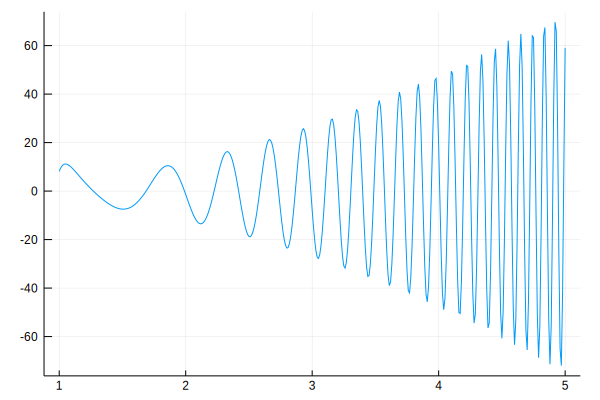

In [74]:
plot(x_range, h_primes, label="")

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

In [ ]:
function newton_dual(f, x0, n_iter=1000)
    xn = dual(x0)
    for i in n_iter
        xnn = xn.x - f(xn).x′ / f(xn).x
    end
    return xn
    
end

## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba